In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.tsv', 'test.tsv', 'sampleSubmission.csv']


In [62]:
data = pd.read_csv('../input/train.tsv',sep='\t')

In [63]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [64]:
import seaborn as sns

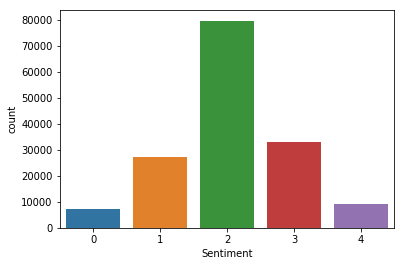

In [65]:
sns.countplot(x='Sentiment',data=data)

In [66]:
# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive

In [67]:
phrase = data['Phrase']
label = data['Sentiment']

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences

In [69]:
import nltk
nltk.download('punkt')

t_data = list()

for i in range(len(phrase)):
    
    if i % 1000 == 0:
        print(i)

    words = nltk.word_tokenize(phrase[i])

    words=[word.lower() for word in words if word.isalpha()]
    
    # remove single character

    words = [word for word in words if len(word) > 1]
    
    t_data.append(words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142

In [70]:
len(t_data)

156060

In [71]:
t_data[0]

['series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'story']

In [72]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

data_l = list()
for i in range(len(t_data)):
    temp = list()
    for j in t_data[i]:
        temp.append(lemmatizer.lemmatize(j))
    data_l.append(temp)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
vocab = list()

for i in data_l:
    for j in i:
        vocab.append(j)

In [74]:
len(vocab)

957280

In [75]:
vocab = set(vocab)
len(vocab)

13306

In [76]:
from keras.preprocessing.text import Tokenizer
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

eng_tokens = tokenization(data_l)
eng_vocab_size = len(eng_tokens.word_index) + 1
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 13307


In [77]:
m = list()
for i in range(len(data_l)):
    m.append(len(data_l[i]))

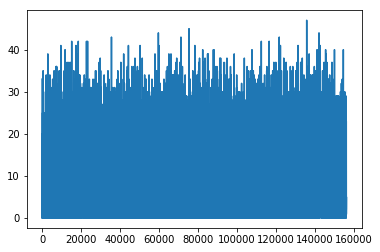

In [78]:
plt.plot(m)

In [79]:
np.max(m)

47

In [80]:
from keras.preprocessing.sequence import pad_sequences
# encode and pad sequences
def encode_sequences(tokenizer,length,lines):
    # integer encode sequences
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

seq_data = encode_sequences(eng_tokens,47,data_l)

In [81]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Y = data.iloc[:,-1].values
Y = to_categorical(Y)

In [82]:
Y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [83]:
seq_data.shape

(156060, 47)

In [84]:
Y.shape

(156060, 5)

In [85]:
seq_data = np.array(seq_data)
Y = np.array(Y)

In [86]:
seq_data

array([[ 307,    2, 6119, ...,    0,    0,    0],
       [ 307,    2, 6119, ...,    0,    0,    0],
       [ 307,    0,    0, ...,    0,    0,    0],
       ...,
       [8256, 8257,    0, ...,    0,    0,    0],
       [8256,    0,    0, ...,    0,    0,    0],
       [8257,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [87]:
Y.shape

(156060, 5)

In [122]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, CuDNNLSTM, Conv1D, GlobalMaxPool1D, SpatialDropout1D
from keras.layers import Bidirectional

embedding_size=300

model=Sequential()
model.add(Embedding(eng_vocab_size, embedding_size, input_length=47, trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Conv1D(128, 1, strides = 1,  padding='causal', activation='relu'))
model.add(Conv1D(256, 3, strides = 1,  padding='causal', activation='relu'))
model.add(Conv1D(512, 5, strides = 1,  padding='causal', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 47, 300)           3992100   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 47, 300)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 47, 200)           321600    
_________________________________________________________________
dropout_33 (Dropout)         (None, 47, 200)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 47, 128)           25728     
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 47, 256)           98560     
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 47, 512)           655872    
__________

In [123]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="model_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [124]:
batch_size = 64
num_epochs = 20
# X_valid, y_valid = X_train[:batch_size*100], Y_train[:batch_size*100,:]
# X_train2, y_train2 = X_train[batch_size:], Y_train[batch_size:,:]
history = model.fit(seq_data, Y, validation_split=0.1, batch_size=batch_size, epochs=num_epochs, verbose=1, callbacks=callbacks_list)

Train on 140454 samples, validate on 15606 samples
Epoch 1/20
140454/140454 [==============================] - 41s 291us/step - loss: 1.2154 - acc: 0.5182 - val_loss: 1.2274 - val_acc: 0.5017

Epoch 00001: val_loss improved from inf to 1.22740, saving model to model_weights.hdf5
Epoch 2/20
140454/140454 [==============================] - 36s 256us/step - loss: 1.1582 - acc: 0.5400 - val_loss: 1.1791 - val_acc: 0.5221

Epoch 00002: val_loss improved from 1.22740 to 1.17913, saving model to model_weights.hdf5
Epoch 3/20
140454/140454 [==============================] - 36s 257us/step - loss: 1.1098 - acc: 0.5587 - val_loss: 1.1417 - val_acc: 0.5386

Epoch 00003: val_loss improved from 1.17913 to 1.14166, saving model to model_weights.hdf5
Epoch 4/20
140454/140454 [==============================] - 36s 255us/step - loss: 1.0687 - acc: 0.5741 - val_loss: 1.1262 - val_acc: 0.5463

Epoch 00004: val_loss improved from 1.14166 to 1.12618, saving model to model_weights.hdf5
Epoch 5/20
140454/140

In [125]:
model.load_weights('model_weights.hdf5')

In [ ]:
test_data = pd.read_csv('../input/test.tsv',sep='\t')

In [ ]:
test_data.head()

In [ ]:
test_phrase = test_data['Phrase']

In [ ]:
test_phrase.shape

In [ ]:
t_data = list()

for i in range(len(test_phrase)):
    
    if i % 1000 == 0:
        print(i)

    words = nltk.word_tokenize(test_phrase[i])

    words=[word.lower() for word in words if word.isalpha()]
    
    # remove single character

    words = [word for word in words if len(word) > 1]
    
    t_data.append(words)

In [ ]:
t_data = np.array(t_data)
t_data.shape

In [ ]:
data_l = list()
for i in range(len(t_data)):
    temp = list()
    for j in t_data[i]:
        temp.append(lemmatizer.lemmatize(j))
    data_l.append(temp)
data_l = np.array(data_l)
data_l.shape

In [ ]:
test_seq_data = encode_sequences(eng_tokens,47,data_l)
test_seq_data.shape

In [ ]:
sample = pd.read_csv('../input/sampleSubmission.csv')
sample.head()

In [ ]:
test_seq_data

In [ ]:
op = model.predict_classes(test_seq_data[0].reshape(-1,47))

In [ ]:
op

In [ ]:
pred = list()

for i in range(len(test_seq_data)):
    if i % 1000 == 0:
        print(i)
    x = model.predict_classes(test_seq_data[i].reshape(-1,47))
    pred.append(x)


In [ ]:
pred = np.array(pred)
pred.shape

In [ ]:
p_id = test_data['PhraseId']
p_id = np.array(p_id).reshape(66292, 1)
p_id.shape

In [ ]:
output = np.array(np.concatenate((p_id, pred), 1))

output = pd.DataFrame(output,columns = ["PhraseId","Sentiment"])

output.to_csv('out.csv',index = False)
